# Spotify 

Your task is to analyse the data given to you and explore predictive tasks that could provide the company with insight on some burning questions such as:

1. What drives cross-regional popularity of music; is it the artist, or something about the song?(explore if artists from certain parts of the world tend to be more popular worldwide)
2. Can we figure out which artists or genres are going to be popular in 2024 given the historic data from 2017?
3. Does the popularity of a track in one region predict its (upcoming?) popularity in other regions?
4. Are there any patterns in what day(s) of the week and/or months experience the most streams?

1. Who are the most popular artists (say top 10)?
2. Who was the most popular each month?
3. Name the songs people dance to the most?
4. Is there a relationship between danceability and energy or loundness of the music?
5. Does a total number of artists affect the popularity of a song?
5. If it does, then can we predict if more artists would make a song more popular
6. How does valency affect the popularity of a song. (A high valence song is about happiness, excitement and joy, whereas a low valence song is about sadness, anger or depression.
7. Check the mean value of audio features of top 10 songs. Can we predict popularity of songs if they have greater value than the mean value for those features?


1. EDA for each feature
2. Release date and popularity date

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, pairwise_distances

In [2]:
data = pd.read_csv(r'C:\Users\sheny\Desktop\AML\cw\Spotify_Dataset_V3.csv',sep=';')

cleaned_data = data.sort_values('Points (Total)', ascending=False).drop_duplicates(subset=['Title', 'Artists'])

cleaned_data .head(100)

cleaned_data.to_csv('cleaned_data.csv', index=False)

C:\Users\sheny\AppData\Local\Temp\ipykernel_37676\2268451730.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  two_group = df.groupby(['Artist_Group', 'Points_Group'])['Points (Total)'].sum().unstack(fill_value=0)
C:\Users\sheny\AppData\Local\Temp\ipykernel_37676\2268451730.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_two_group = df.groupby('Artist_Group')['Points (Total)'].sum()


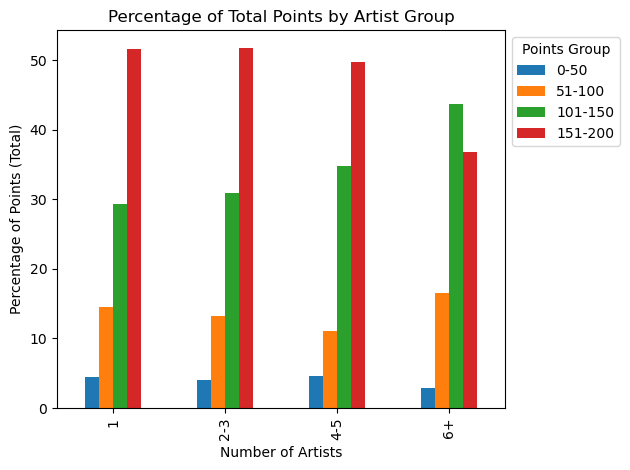

In [10]:
df = cleaned_data

df['Collaboration'] = df['Artists'].str.count(',') + 1

df['Artist_Group'] = pd.cut(df['Collaboration'], bins=[0, 1, 3, 5, float('inf')], labels=['1', '2-3', '4-5', '6+'], right=True, include_lowest=True)

df['Points_Group'] = pd.cut(df['Points (Total)'], bins=[0, 51, 101, 151, float('inf')], labels=['0-50', '51-100', '101-150', '151-200'], right=False)

two_group = df.groupby(['Artist_Group', 'Points_Group'])['Points (Total)'].sum().unstack(fill_value=0)

sum_two_group = df.groupby('Artist_Group')['Points (Total)'].sum()

percentage_two_group = (two_group.div(sum_two_group, axis=0) * 100).fillna(0)

percentage_two_group.plot(kind='bar', stacked=False)
plt.xlabel('Number of Artists')
plt.ylabel('Percentage of Points (Total)')
plt.title('Percentage of Total Points by Artist Group')
plt.legend(title='Points Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

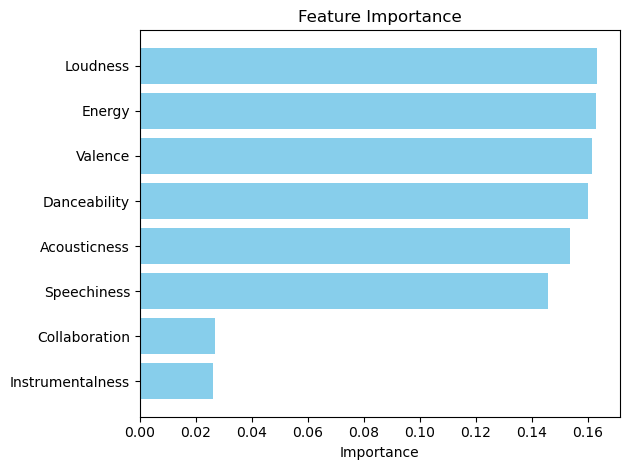

MAE: 50.79154653708863
MSE: 3449.044691108703
RMSE: 58.728567930000665
R² Score: 0.008208382387881796


In [7]:
df = cleaned_data

df['Collaboration'] = df['Artists'].str.count(',') + 1

X = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Collaboration']]
y = df['Points (Total)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

param = {
    'n_estimators': [100, 300, 500],
    'max_depth': [20, 30, 40, None],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [10, 20, 50],
    'max_features': [None, 'sqrt', 'log2'],
}
grid_search = GridSearchCV(model, param, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

upgrade_model = grid_search.best_estimator_

y_pred = upgrade_model.predict(X_test)

feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

plt.barh(feature_importances.index, feature_importances['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R² Score:', r2_score(y_test, y_pred))